In [1]:
from importlib import reload
from src.GEFConstructor import CreateGEF

import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Comparison Run
ntr = 240
tfin = 245
tmid = 120
GEFComp = CreateGEF("Config/ClassicGEF-Test.py")
GEFComp.RunGEF(ntr, tend=tfin, restart=False)


GEF1 = CreateGEF("Config/ClassicGEF-Test.py")
sol = GEF1.RunGEF(ntr, tend=tmid, restart=False)

No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
[0.000e+00 1.000e-01 2.000e-01 ... 2.448e+02 2.449e+02 2.450e+02]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_20568/1014767424.py", line 6, in <module>
    GEFComp.RunGEF(ntr, tend=tfin, restart=False)
  File "/home/users/rfreiher/Documents/Axion_Inflation/GEF/src/GEFClassic/GEFClassic.py", line 365, in RunGEF
    if not(x.completed):
  File "/home/users/rfreiher/Documents/Axion_Inflation/GEF/src/GEFClassic/GEFClassic.py", line 357, in SolveGEF
    print(teval)
  File "/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py", line 602, in solve_ivp
    message = solver.step()
  File "/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/site-packages/scipy/integrate/_ivp/base.py", line 197, in step
    success, message = self._step_impl()
  File "/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/s

In [ ]:
GEF2 = CreateGEF("Config/ClassicGEF-Test.py")

GEF2.vals = {}
GEF2.vals["t"] = sol.t[-1]
GEF2.vals["N"] = sol.y[0,-1]
GEF2.vals["phi"] = sol.y[1,-1]
GEF2.vals["dphi"] = sol.y[2,-1]
GEF2.vals["kh"] = np.exp(sol.y[3,-1])
F = sol.y[4:,-1].reshape(ntr+1,3)
GEF2.vals["E"] = F[:,0]
GEF2.vals["B"] = F[:,1]
GEF2.vals["G"] = F[:,2]
GEF2.ntr=ntr+1

GEF2.omega=GEF2.H0
GEF2.f=GEF2.Mpl
GEF2.ratio = GEF2.omega/GEF2.f
GEF2.units=False
yini = GEF2.ReInitialiseGEF()
GEF2.RunGEF(ntr, tend=tfin, restart=True)

No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
[115.  115.1 115.2 ... 234.8 234.9 235. ]
Elapsed time: 16.0916 seconds
success: True


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.150e+02  1.151e+02 ...  2.349e+02  2.350e+02]
        y: [[ 6.174e+01  6.176e+01 ...  6.739e+01  6.739e+01]
            [ 1.906e+00  1.899e+00 ...  1.192e-01  1.190e-01]
            ...
            [-1.515e+69 -8.104e+67 ... -3.706e-54 -4.184e-54]
            [ 2.174e+68  1.030e+67 ... -5.278e-57 -6.727e-57]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3452
     njev: 0
      nlu: 0

244.3843520106524


3.915915816822987e-05
[67.24679598]
3.915915816822987e-05
[67.24605924]


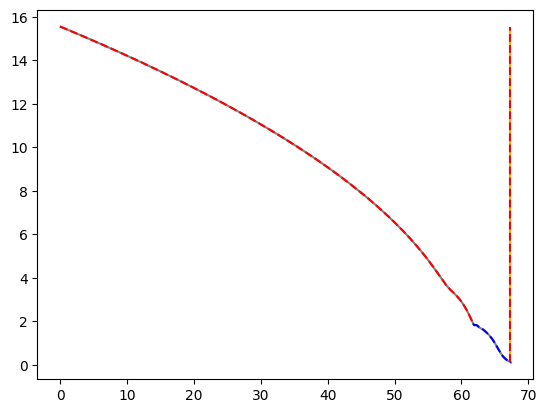

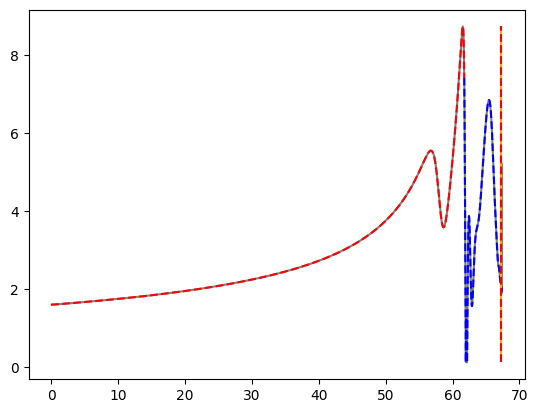

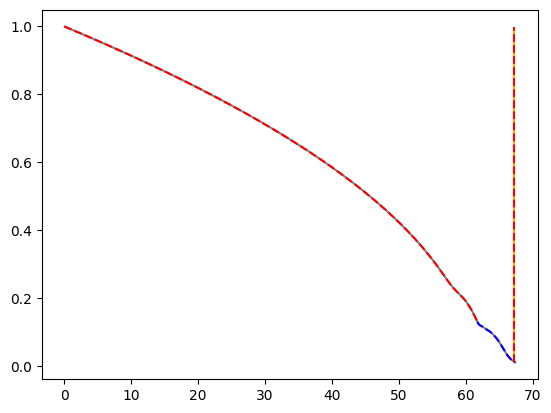

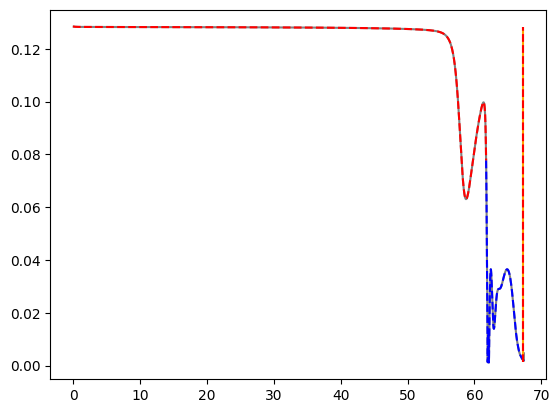

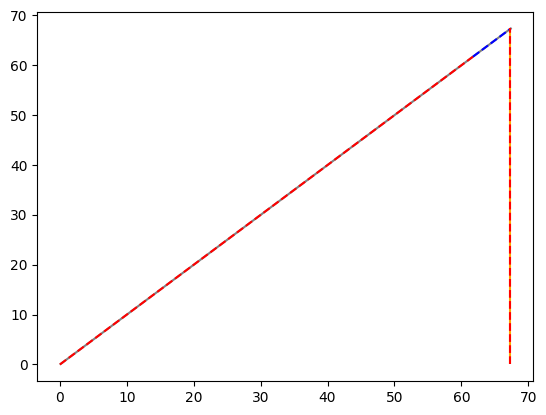

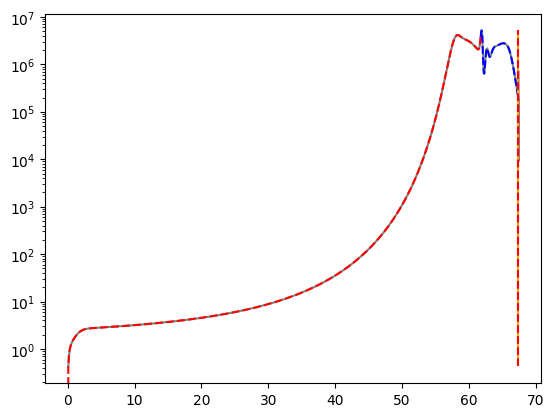

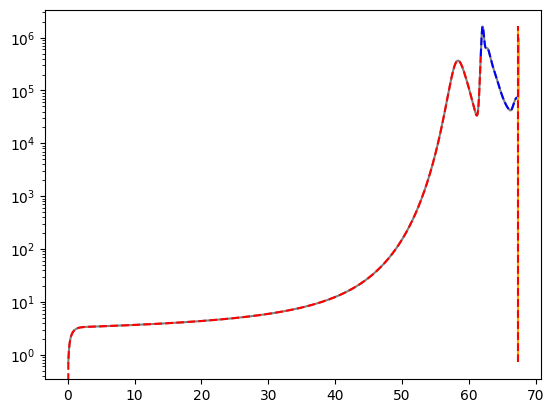

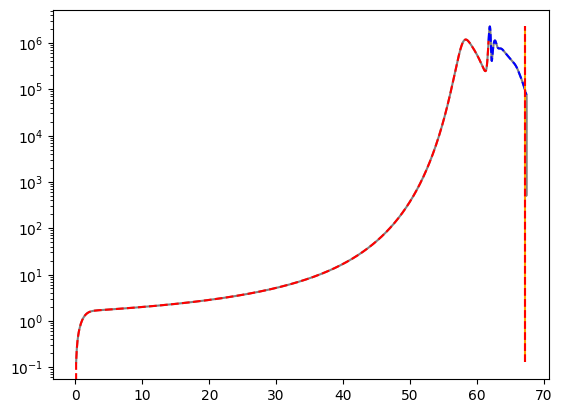

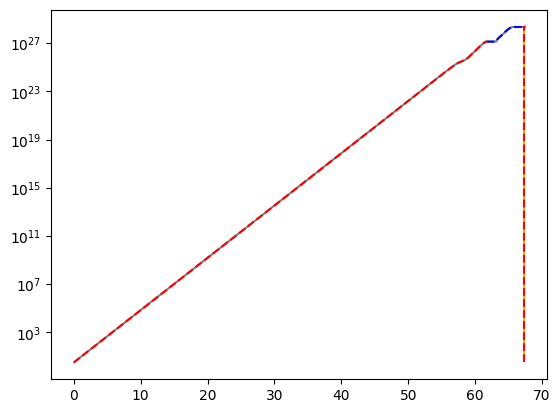

In [ ]:
keys = ["phi", "xi", "H", "dphi", "N"]
Nend1 = GEFComp.EndOfInflation()[0]
Nend2 = GEF2.EndOfInflation()[0]
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    plt.plot(GEF2.vals["N"], abs(GEF2.vals[key]), "b--")
    plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.show()
keys = ["E", "B", "G", "kh"]
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    plt.plot(GEF2.vals["N"], abs(GEF2.vals[key]), "b--")
    plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.yscale("log")
    plt.show()
        


In [ ]:
G.Unitful()

epsH = -G.vals["Hprime"]/G.vals["H"]**2

fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,10))
ax[0].plot(G.vals["N"], G.vals["H"], "k")
ax[0].set_ylim(0.725e-5,1.61e-5)
yticks = np.round(np.arange(0.8, 1.61, 0.2),1)
ytickslab = [rf"${ytick}$" + r"$\times 10^{-5}$" for ytick in yticks]
ax[0].set_yticks(yticks*1e-5, ytickslab)
yticksmin = np.arange(0.75, 1.65, 0.05)
ax[0].set_yticks(yticksmin*1e-5, minor=True)
ax[0].set_ylabel(r"$H/M_{\rm P}$")

ax[1].plot(G.vals["N"], epsH, "k")
yticks = [5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
ytickslab = [r"$5 \times 10^{-4}$", r"$0.001$", r"$0.005$", r"$0.010$", r"$0.050$", r"$0.100$"]

ax[1].set_ylim(4e-4,0.2)
ax[1].set_yscale("log")
ax[1].set_yticks(yticks, ytickslab)
ax[1].set_ylabel(r"$\varepsilon_H$")

ax[2].plot(G.vals["N"], G.vals["xi"], "k")
ax[2].set_ylim(4e-4,0.2)
ax[2].set_yscale("log")

ax[2].set_xticks(np.arange(0, 70, 10))
ax[2].set_xticks(np.arange(0, 70, 2), minor=True)
ax[2].set_xlim(-1, 61)
plt.subplots_adjust(hspace=0)
plt.show()

NameError: name 'G' is not defined